In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))



['asl_alphabet_test', 'asl_alphabet_train']


Using TensorFlow backend.


Samples images for letter A


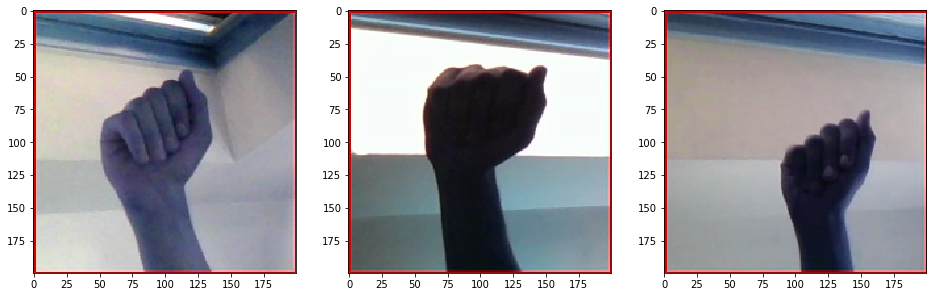

In [3]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# ensure consistency across runs
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    base_path = '../input/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

plot_three_samples('A')

In [4]:
data_dir = "../input/asl_alphabet_train/asl_alphabet_train"
target_size = (128, 128)
target_dims = (128, 128, 3) # add channel for RGB
n_classes = 29
val_frac = 0.1
batch_size = 250

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    validation_split=val_frac,
                                    samplewise_std_normalization=True
                               )

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training",color_mode='rgb')
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation",color_mode='rgb')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [9]:
my_model = Sequential()
my_model.add(Conv2D(32, kernel_size=5, strides=1, activation='relu', input_shape=target_dims))
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu'))
my_model.add(Flatten())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(n_classes, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 121, 121, 64)      32832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 58, 58, 128)       73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 58, 58, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 128)       147584    
__________

In [10]:
history = my_model.fit_generator(train_generator, epochs=10, validation_data=val_generator, steps_per_epoch=78300//250, validation_steps = 8700//250)

Epoch 1/10
313/313 [==============================] - 259s 827ms/step - loss: 1.6150 - acc: 0.4983 - val_loss: 0.9262 - val_acc: 0.7121
Epoch 2/10
313/313 [==============================] - 256s 817ms/step - loss: 0.3727 - acc: 0.8727 - val_loss: 0.6303 - val_acc: 0.7867
Epoch 3/10
313/313 [==============================] - 254s 811ms/step - loss: 0.1840 - acc: 0.9383 - val_loss: 0.5782 - val_acc: 0.8151
Epoch 4/10
313/313 [==============================] - 255s 816ms/step - loss: 0.1221 - acc: 0.9603 - val_loss: 0.5339 - val_acc: 0.8226
Epoch 5/10
313/313 [==============================] - 254s 813ms/step - loss: 0.0943 - acc: 0.9691 - val_loss: 0.6467 - val_acc: 0.8105
Epoch 6/10
313/313 [==============================] - 248s 791ms/step - loss: 0.0763 - acc: 0.9758 - val_loss: 0.5753 - val_acc: 0.8103
Epoch 7/10
313/313 [==============================] - 246s 787ms/step - loss: 0.0651 - acc: 0.9790 - val_loss: 0.5497 - val_acc: 0.8385
Epoch 8/10
313/313 [============================

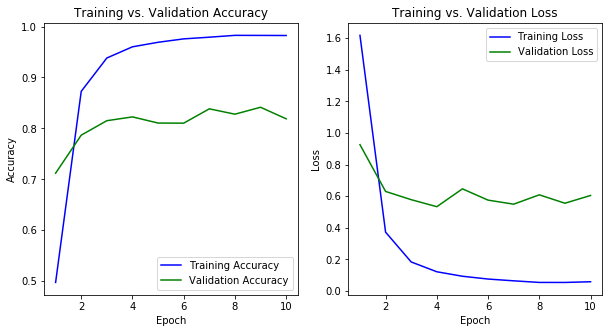

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, c = 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, c = 'g', label = 'Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, c = 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, c = 'g', label = 'Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
output = {'0':'A','1':'B','2':'C','3':'D','4':'E','5':'F','6':'G','7':'H','8':'I','9':'J','10':'K','11':'L','12':'M','13':'N',
          '14':'O','15':'P','16':'Q','17':'R','18':'S','19':'T','20':'U','21':'V','22':'W','23':'X','24':'Y','25':'Z','26':'del',
          '27':'nothing','28':'space'}
test_dir = "../input/asl_alphabet_test/asl_alphabet_test/"
for img in os.listdir(test_dir):
            path = test_dir+img
            image = cv2.imread(path)
            image = cv2.resize(image,(128,128))
            image = np.reshape(image,[1,128,128,3])
            op = np.array2string(my_model.predict_classes(image))
            print(img + " ---->  " +output[op[1:-1]])

T_test.jpg ---->  F
nothing_test.jpg ---->  S
Z_test.jpg ---->  del
D_test.jpg ---->  Z
K_test.jpg ---->  K
F_test.jpg ---->  F
space_test.jpg ---->  Y
Y_test.jpg ---->  space
M_test.jpg ---->  V
U_test.jpg ---->  space
B_test.jpg ---->  L
G_test.jpg ---->  P
C_test.jpg ---->  C
X_test.jpg ---->  X
E_test.jpg ---->  N
R_test.jpg ---->  J
J_test.jpg ---->  space
S_test.jpg ---->  X
I_test.jpg ---->  F
N_test.jpg ---->  S
V_test.jpg ---->  space
L_test.jpg ---->  W
W_test.jpg ---->  X
Q_test.jpg ---->  space
P_test.jpg ---->  space
O_test.jpg ---->  D
H_test.jpg ---->  G
A_test.jpg ---->  L
